# Embodied cognition on Wikipedia: a data analysis
In what follows, an analysis of the page edits and views count is done. The data is provided by the WikipediaStatistics at en.wikipedia.org

### Load data

In [71]:
import pandas as pd
from matplotlib import pyplot as plt
import datetime

df_views_count = pd.read_csv('wiki_ec_page_views.csv', delimiter=",", header=0, index_col=False)

df_edits_count = pd.read_csv('wiki_ec_edits_count2.csv', delimiter=",", header=0, index_col=False)

# Converting date to a datestamp type
df_views_count["DateTime"] = pd.to_datetime(df_views_count["DateTime"])
df_edits_count["Month"] = pd.to_datetime(df_edits_count["Month"])


# # Check for missing values
# print(df_views_count.isnull().sum())
print(df_edits_count.isnull().sum())
#
# Setting DateTime as index in csv files
df_views_count = df_views_count.set_index("DateTime")
df_edits_count = df_edits_count.set_index("Month")

df_edits_count.index

Month             0
Edits             0
IPs               0
IPs               0
Minor edits       0
Minor edits       0
Size            208
dtype: int64


DatetimeIndex(['2002-04-01', '2002-05-01', '2002-06-01', '2002-07-01',
               '2002-08-01', '2002-09-01', '2002-10-01', '2002-11-01',
               '2002-12-01', '2004-01-01',
               ...
               '2021-06-01', '2021-07-01', '2021-08-01', '2021-09-01',
               '2021-10-01', '2021-11-01', '2021-12-01', '2022-01-01',
               '2022-02-01', '2022-03-01'],
              dtype='datetime64[ns]', name='Month', length=228, freq=None)

### 1. Edits count

In [79]:
df_edits_count = df_edits_count.fillna(0).astype(int)
df_edits_count

,Edits,IPs,IPs,Minor edits,Minor edits,Size
Month,,,,,,
2002-04-01,7,6,85,2,28,492
2002-05-01,0,0,0,0,0,0
2002-06-01,0,0,0,0,0,0
2002-07-01,0,0,0,0,0,0
2002-08-01,0,0,0,0,0,0
...,...,...,...,...,...,...
2021-11-01,19,2,10,2,10,0
2021-12-01,53,1,1,17,32,0
2022-01-01,87,0,0,31,35,166875


In [80]:
# Select the edits per year and month
edits_year = df_edits_count.index.year
print(edits_year)

Int64Index([2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2004,
            ...
            2021, 2021, 2021, 2021, 2021, 2021, 2021, 2022, 2022, 2022],
           dtype='int64', name='Month', length=228)


In [81]:
size_year = df_edits_count["Size"].groupby(edits_year).sum()
size_year

Month
2002       492
2004      5566
2005      5782
2006      6699
2007      6896
2008     16678
2009     14475
2010     21183
2011     54061
2012     55732
2013     57889
2014     62237
2015     71509
2016     75652
2017     76022
2018     76624
2019     77759
2020     77549
2021    137795
2022    166875
Name: Size, dtype: int64

In [132]:
# Sum per year
edit_sum_year = df_edits_count["Edits"].groupby(edits_year).sum()
minor_sum_year = df_edits_count["Minor edits"].groupby(edits_year).sum()
editors_sum_year = df_edits_count["IPs"].groupby(edits_year).sum()
size_year = df_edits_count["Size"].groupby(edits_year).sum()

edit_sum_year  = pd.DataFrame(edit_sum_year)
edit_sum_year["Minor edits"] = pd.DataFrame(minor_sum_year)
edit_sum_year["Editors"] = pd.DataFrame(editors_sum_year)
# edit_sum_year['Size'] = pd.DataFrame(size_year)
edit_sum_year

size_year = pd.DataFrame(size_year)

<Figure size 1800x1080 with 0 Axes>

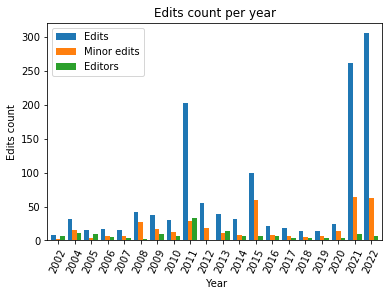

In [138]:
# sns.histplot(df_edit_sum_year, x="Month", )
plt.figure(figsize=(25,15))

# ax = edit_sum_year.plot(kind='line')
ax = edit_sum_year.plot(kind="bar", width = 0.82)

ax.set_xlabel(" Year")
ax.set_ylabel("Edits count")
ax.set_title("Edits count per year")
plt.xticks(rotation=65)

# Save image high resolution image

image_format = 'eps' # e.g .png, .svg, etc.
# Uncomment to save image
# plt.savefig('Images/edits_count.eps', format=image_format, dpi=1200)
plt.show()


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, '2002'),
  Text(1, 0, '2004'),
  Text(2, 0, '2005'),
  Text(3, 0, '2006'),
  Text(4, 0, '2007'),
  Text(5, 0, '2008'),
  Text(6, 0, '2009'),
  Text(7, 0, '2010'),
  Text(8, 0, '2011'),
  Text(9, 0, '2012'),
  Text(10, 0, '2013'),
  Text(11, 0, '2014'),
  Text(12, 0, '2015'),
  Text(13, 0, '2016'),
  Text(14, 0, '2017'),
  Text(15, 0, '2018'),
  Text(16, 0, '2019'),
  Text(17, 0, '2020'),
  Text(18, 0, '2021'),
  Text(19, 0, '2022')])

<Figure size 1800x1080 with 0 Axes>

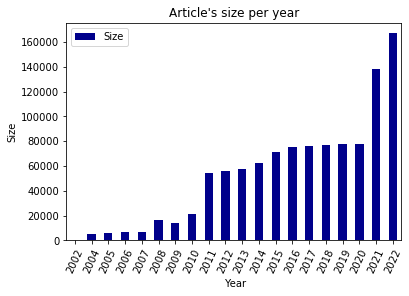

In [153]:
size_year = pd.DataFrame(size_year)

plt.figure(figsize=(25,15))
ax = size_year.plot(kind="bar", width = 0.5, color="darkblue")
ax.set_xlabel(" Year")
ax.set_ylabel("Size")
ax.set_title("Article's size per year")
plt.xticks(rotation=65)

### 2. Views count

In [68]:
df_views_count

,Embodied cognition[en],Cognitive science[en],Cognition[en]
DateTime,,,
2008-01-01,12,426,612
2008-01-02,4,600,1147
2008-01-03,4,641,1256
2008-01-04,14,627,1197
2008-01-05,7,521,864
...,...,...,...
2022-03-13,156,224,395
2022-03-14,196,318,561
2022-03-15,186,293,574


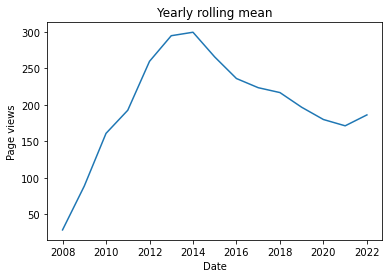

In [95]:
# select the month
df_month = df_views_count.index.month
df_year = df_views_count.index.year
# Moving averages per year (52 weeks window)
df_mean = df_views_count['Embodied cognition[en]'].groupby(df_year).mean()

ax = df_mean.plot()
ax.set_xlabel("Date")
ax.set_ylabel("Page views")
ax.set_title("Yearly rolling mean")

plt.show()

In [374]:
views_before_project = df_views_count['2020-03-01':'2021-02-28']
views_during_project = df_views_count['2021-03-01':'2022-02-28']


views_average_1 = df_views_count['2008-03-01':'2020-02-28']

views_average_1
views_average_1_month = views_average_1.index.month
#
#
views_average_1 = views_average_1['Embodied cognition[en]'].groupby(views_average_1_month).mean()
#
# # views_during_project
# views_before_project_month = views_before_project.index.month
# views_during_project_month = views_during_project.index.month
#
views_average_1
# # views_during_project.tail(50)
#

DateTime
1     216.911290
2     243.355030
3     228.083333
4     234.469444
5     213.661290
6     172.911111
7     146.502688
8     150.236559
9     195.669444
10    241.295699
11    245.041667
12    209.336022
Name: Embodied cognition[en], dtype: float64

In [377]:
views_during_project_mean = views_during_project['Embodied cognition[en]'].groupby(views_during_project_month).mean()
views_before_project_mean = views_before_project['Embodied cognition[en]'].groupby(views_before_project_month).mean()
views_cogsci_project_mean = views_during_project['Cognitive science[en]'].groupby(views_during_project_month).sum()

mean_view_average_before = views_before_project_mean / views_average_1
mean_view_average_after = views_during_project_mean / views_average_1

# Without normalizing
mean_view = pd.DataFrame()
mean_view['Before'] = pd.DataFrame(views_before_project_mean)
mean_view['After'] = pd.DataFrame(views_during_project_mean)
# mean_view['CogSci'] = pd.DataFrame(views_cogsci_project_mean)
# mean_view
# mean_view.describe()

# Normalizing the data
mean_view_averaged = pd.DataFrame()
mean_view_averaged['Before'] = pd.DataFrame(mean_view_average_before)
mean_view_averaged['After'] = pd.DataFrame(mean_view_average_after)

mean_view_averaged.describe()

,Before,After
count,12.000000,12.000000
mean,0.856535,0.834481
std,0.070292,0.041711
min,0.761748,0.758592
25%,0.807020,0.806702
50%,0.858352,0.837091
75%,0.898023,0.855575
max,1.011361,0.913186


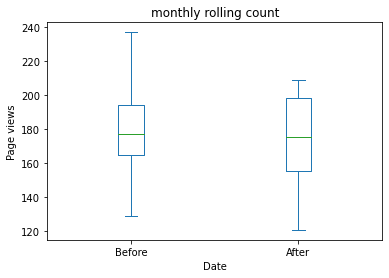

In [365]:
# fig, ax  = plt.subplots()

ax = mean_view.plot(kind='box')
# ax = mean_view.plot()
ax.set_xlabel("Date")
ax.set_ylabel("Page views")
ax.set_title("monthly rolling count")

plt.show()

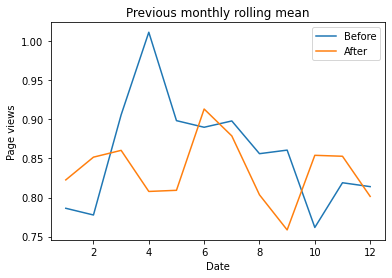

In [378]:
views_before_project_mean = views_before_project['Embodied cognition[en]'].groupby(views_before_project_month)

ax = mean_view_averaged.plot()
ax.set_xlabel("Date")
ax.set_ylabel("Page views")
ax.set_title("Previous monthly rolling mean")

plt.show()